In [1]:
from utility_functions import generate_diameters, place_circles_bc1, save_circles, save_attempts, calculate_packing_efficiency, place_circles_bc1_kdtree, is_overlapping
from graphing_tools import plot_circles, plot_distribution
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import truncnorm
from collections import defaultdict
import time


In [34]:
def place_circles(truncated_diameters,  max_attempts, sheet_width, sheet_height):
    allocated_circles = []
    attempts_dict = defaultdict(int)
    np.random.seed(42)
    total_tries = 0
    while True:
        diameter = np.random.choice(truncated_diameters)
        attempts = 0
        
        while attempts < max_attempts:  
          radius = diameter / 2
          x = int(np.random.uniform(radius, sheet_width - radius))
          y = int(np.random.uniform(radius, sheet_height - radius))
          new_circle = (x, y, radius)
          if not is_overlapping(new_circle, allocated_circles):
              allocated_circles.append(new_circle)
              attempts_dict[attempts] += 1 
              break
               
          attempts += 1
            
        if attempts == max_attempts:            
            total_tries += 1
            # return allocated_circles, attempts_dict, total_tries
            print(f"❌ Skipped a circle after {max_attempts} attempts. Skip count: {total_tries}")
        if (total_tries*100)/len(allocated_circles) > 1:
            return allocated_circles, attempts_dict, total_tries
        
        
    return allocated_circles, attempts_dict, total_tries

In [5]:
# Sheet dimensions
sheet_width = 1000
sheet_height = 1000

# Circle Distribution parameters
mean_diameter = 20
std_diameter = 5
min_diameter = 10
max_diameter = 30


population_size = 1000000

allocated_circles = []
attempts_dict = defaultdict(int)
max_attempts=1000000

In [40]:
raw_diameters = generate_diameters(population_size, mean_diameter, std_diameter)

truncated_diameters = raw_diameters[(raw_diameters >= min_diameter) & (raw_diameters <= max_diameter)]
allocated_circles, attempts_dict, total_tries = place_circles(truncated_diameters, max_attempts, sheet_width, sheet_height)
save_circles(allocated_circles, "data/allocated_circles_Experiment5.csv")


❌ Skipped a circle after 1000000 attempts. Skip count: 1
❌ Skipped a circle after 1000000 attempts. Skip count: 2
❌ Skipped a circle after 1000000 attempts. Skip count: 3
❌ Skipped a circle after 1000000 attempts. Skip count: 4
❌ Skipped a circle after 1000000 attempts. Skip count: 5
❌ Skipped a circle after 1000000 attempts. Skip count: 6
❌ Skipped a circle after 1000000 attempts. Skip count: 7
❌ Skipped a circle after 1000000 attempts. Skip count: 8
❌ Skipped a circle after 1000000 attempts. Skip count: 9
❌ Skipped a circle after 1000000 attempts. Skip count: 10
❌ Skipped a circle after 1000000 attempts. Skip count: 11
❌ Skipped a circle after 1000000 attempts. Skip count: 12
❌ Skipped a circle after 1000000 attempts. Skip count: 13
❌ Skipped a circle after 1000000 attempts. Skip count: 14
❌ Skipped a circle after 1000000 attempts. Skip count: 15
❌ Skipped a circle after 1000000 attempts. Skip count: 16
❌ Skipped a circle after 1000000 attempts. Skip count: 17


Packing Efficiency: 0.5027 (50.27%)


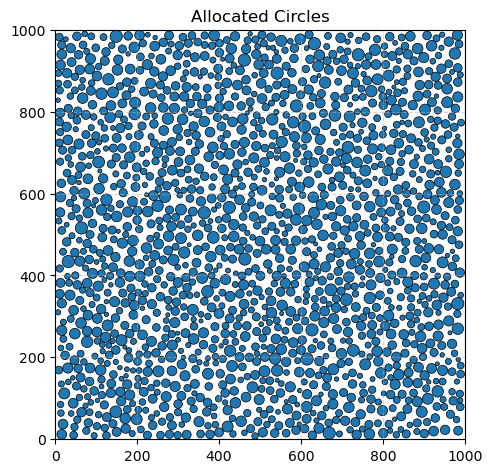

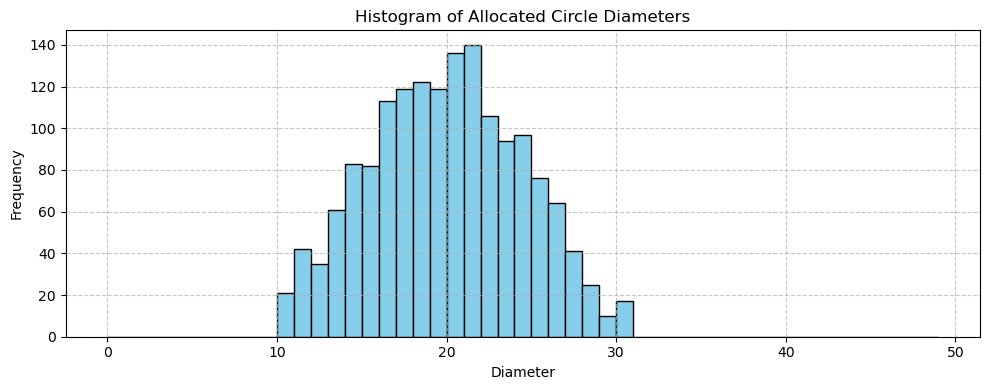

In [7]:
allocated_circles = pd.read_csv('data/allocated_circles_Experiment5.csv')
packing_efficiency = calculate_packing_efficiency(sheet_width, sheet_height, allocated_circles)
print(f"Packing Efficiency: {packing_efficiency:.4f} ({packing_efficiency*100:.2f}%)")
plot_circles(sheet_width, sheet_height, allocated_circles)
plot_distribution(0, 50, allocated_circles)

In [51]:
len(allocated_circles)

1603

In [54]:
total_tries

17